In [1]:
%cd ..

/Users/raiota/git/github.com/raiota/Sound-Simulation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

from tools import *

In [3]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams["font.size"] = 15

In [4]:
STEP = 0.02
X = np.arange(0, 4+STEP, STEP)
Y = np.arange(-2, 2+STEP, STEP)
Z = np.array([0])

FREQS = np.array([800])

In [5]:
FIELDS = ReceiverParams(x=X, y=Y, z=Z, is_meshgrid=True, description='mesh points')

In [6]:
SOURCE_SHAPE = source.SourceCategory.POINT
POINT_SOURCE = source.SourceParams(shape=SOURCE_SHAPE, source_param_list=np.array([-8., 0, 0]))
print(POINT_SOURCE)

{0: {'x': -8.0, 'y': 0.0, 'z': 0.0}}


In [7]:
calctools = calculator.PointSourceFreeFieldCalculator(sources=POINT_SOURCE, receivers=FIELDS, frequency=FREQS)

PRESSURE = calctools.get_pressure()
SPL = calctools.get_SPL()
PHASE = calctools.get_phase()

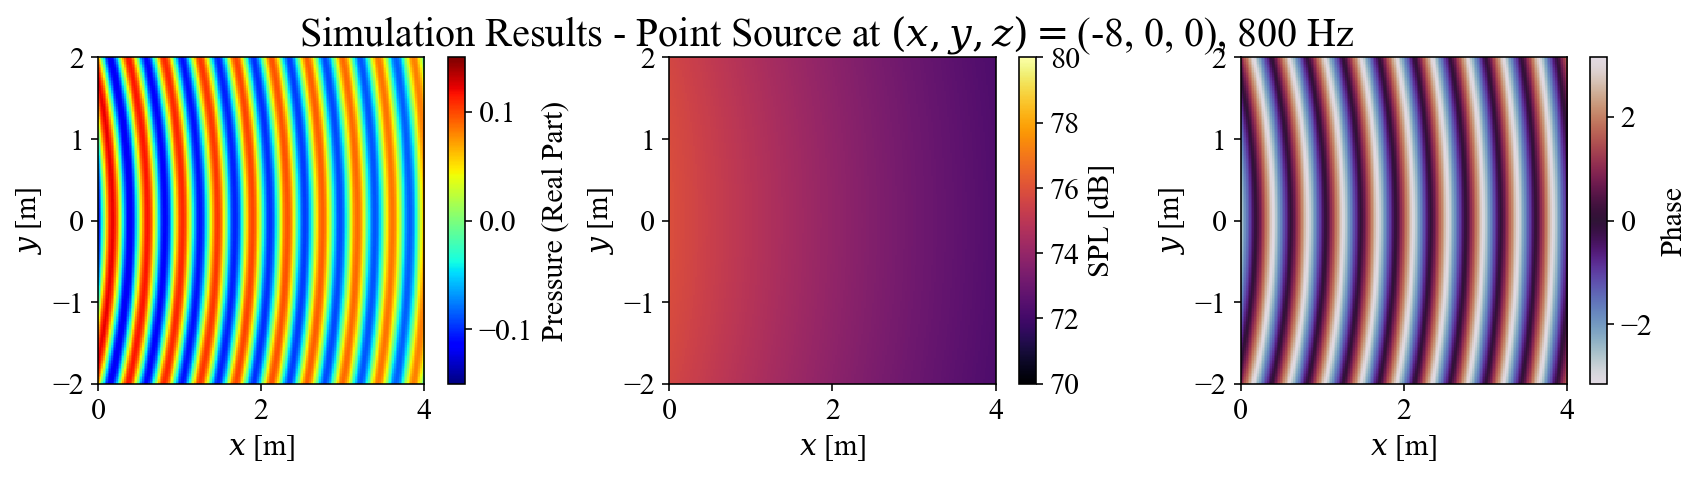

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(14.5, 3))
fig.suptitle(fr'Simulation Results - Point Source at $(x, y, z)=$(-8, 0, 0), {FREQS[0]} Hz', size=20)

im1 = axes[0].pcolorfast(X, Y, PRESSURE[0].real.reshape(X.size, Y.size), vmin=-0.15, vmax=0.15, cmap='jet')
axes[0].set_aspect('equal')
axes[0].set_xlabel(r'$x$ [m]')
axes[0].set_ylabel(r'$y$ [m]')
fig.colorbar(im1, ax=axes[0]).set_label('Pressure (Real Part)')

im2 = axes[1].pcolorfast(X, Y, SPL[0].reshape(X.size, Y.size), vmin=80, vmax=70, cmap='inferno')
axes[1].set_aspect('equal')
axes[1].set_xlabel(r'$x$ [m]')
axes[1].set_ylabel(r'$y$ [m]')
fig.colorbar(im2, ax=axes[1]).set_label('SPL [dB]')

im3 = axes[2].pcolorfast(X, Y, PHASE[0].reshape(X.size, Y.size), cmap='twilight')
axes[2].set_aspect('equal')
axes[2].set_xlabel(r'$x$ [m]')
axes[2].set_ylabel(r'$y$ [m]')
fig.colorbar(im3, ax=axes[2]).set_label('Phase')

fig.subplots_adjust()

In [9]:
# Set the microphones
MIC_X = np.linspace(1, 2, 5)
MIC_Y = np.linspace(-0.5, 0.5, 5)
MIC_Z = np.array([0.])

MICS = receiver.ReceiverParams(x=MIC_X, y=MIC_Y, z=MIC_Z, is_meshgrid=True, description='microphones')

In [10]:
# Set the linear speaker array
SPEAKERS = source.SourceParams(SOURCE_SHAPE,
                               source_param_list=np.array([0, -1, 0,
                                                           0, -0.75, 0,
                                                           0, -0.5, 0,
                                                           0, -0.25, 0,
                                                           0, 0, 0,
                                                           0, 0.25, 0,
                                                           0, 0.5, 0,
                                                           0, 0.75, 0,
                                                           0, 1, 0]))

In [11]:
FIELD_CATEGORY = FieldCategory.SPHERICAL
APPROACH = Estimator.PM_LS

reproductor = ReproductionTool(primary_field_type=FIELD_CATEGORY, primary_source=POINT_SOURCE,
                    fields=FIELDS, control_points=MICS, secondary_sources=SPEAKERS, frequency=FREQS, estimator=APPROACH)

In [12]:
P_REP = reproductor.get_secondary_pressure(activation_vector=(1, 0, 1, 0, 1, 0, 1, 0, 1))

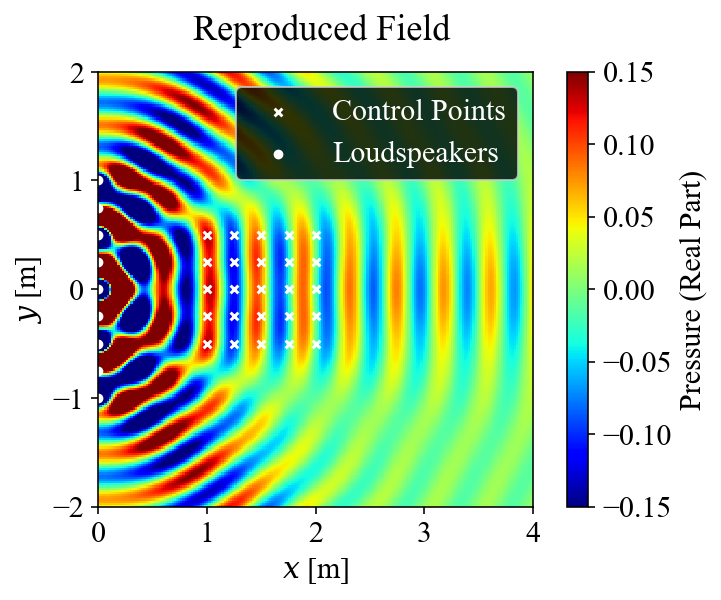

In [13]:
fig, ax = plt.subplots()
fig.suptitle(f'Reproduced Field')

im = ax.pcolorfast(X, Y, P_REP.real.reshape(X.size, Y.size), vmin=-0.15, vmax=0.15, cmap='jet')
ax.set_xlabel(r'$x$ [m]')
ax.set_ylabel(r'$y$ [m]')
ax.set_aspect('equal')
fig.colorbar(im).set_label('Pressure (Real Part)')

ax.scatter(MICS.values[:, 0], MICS.values[:, 1], s=15, c='white', marker="x", label='Control Points')
ax.scatter(SPEAKERS.get_arbit_param('x'), SPEAKERS.get_arbit_param('y'), s=15, c='white', marker="o", label='Loudspeakers')

leg = ax.legend(facecolor='black')
for txt in leg.get_texts():
    txt.set_color('white')

In [18]:
NE = reproductor.get_normalized_error(activation_vector=(1, 0, 1, 0, 1, 0, 1, 0, 1))

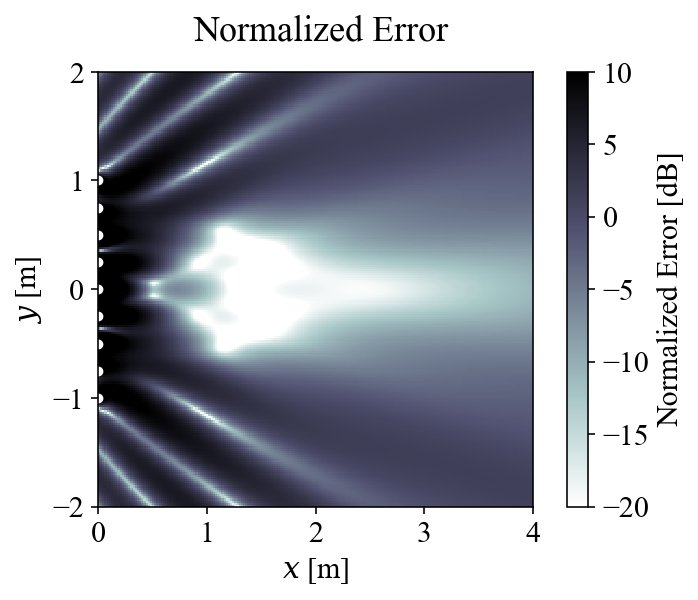

In [19]:
fig, ax = plt.subplots()
fig.suptitle(f'Normalized Error')

im = ax.pcolorfast(X, Y, NE[0].reshape(X.size, Y.size), vmin=10, vmax=-20, cmap='bone_r')
ax.set_xlabel(r'$x$ [m]')
ax.set_ylabel(r'$y$ [m]')
ax.set_aspect('equal')
fig.colorbar(im).set_label('Normalized Error [dB]')

ax.scatter(SPEAKERS.get_arbit_param('x'), SPEAKERS.get_arbit_param('y'), s=15, c='white', marker="o")

In [20]:
# Set the linear speaker array
TEMP_SPEAKERS = source.SourceParams(SOURCE_SHAPE,
                               source_param_list=np.array([0, -1, 0,
                                                           0, -0.5, 0,
                                                           0, 0, 0,
                                                           0, 0.5, 0,
                                                           0, 1, 0]))

In [21]:
reproductor_true = ReproductionTool(primary_field_type=FIELD_CATEGORY, primary_source=POINT_SOURCE,
                    fields=FIELDS, control_points=MICS, secondary_sources=TEMP_SPEAKERS, frequency=FREQS, estimator=APPROACH)
P_REP_true = reproductor_true.get_secondary_pressure()

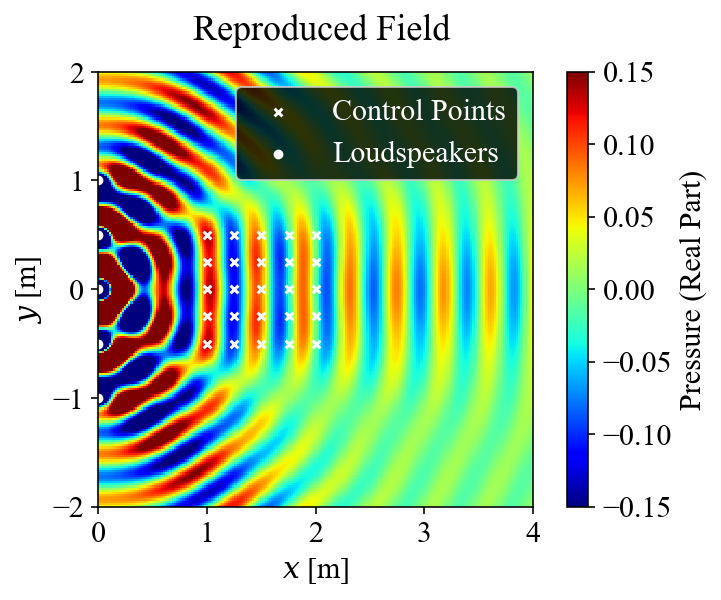

In [22]:
fig, ax = plt.subplots()
fig.suptitle(f'Reproduced Field')

im = ax.pcolorfast(X, Y, P_REP_true.real.reshape(X.size, Y.size), vmin=-0.15, vmax=0.15, cmap='jet')
ax.set_xlabel(r'$x$ [m]')
ax.set_ylabel(r'$y$ [m]')
ax.set_aspect('equal')
fig.colorbar(im).set_label('Pressure (Real Part)')

ax.scatter(MICS.values[:, 0], MICS.values[:, 1], s=15, c='white', marker="x", label='Control Points')
ax.scatter(TEMP_SPEAKERS.get_arbit_param('x'), TEMP_SPEAKERS.get_arbit_param('y'), s=15, c='white', marker="o", label='Loudspeakers')

leg = ax.legend(facecolor='black')
for txt in leg.get_texts():
    txt.set_color('white')

In [26]:
NE_true = reproductor_true.get_normalized_error()

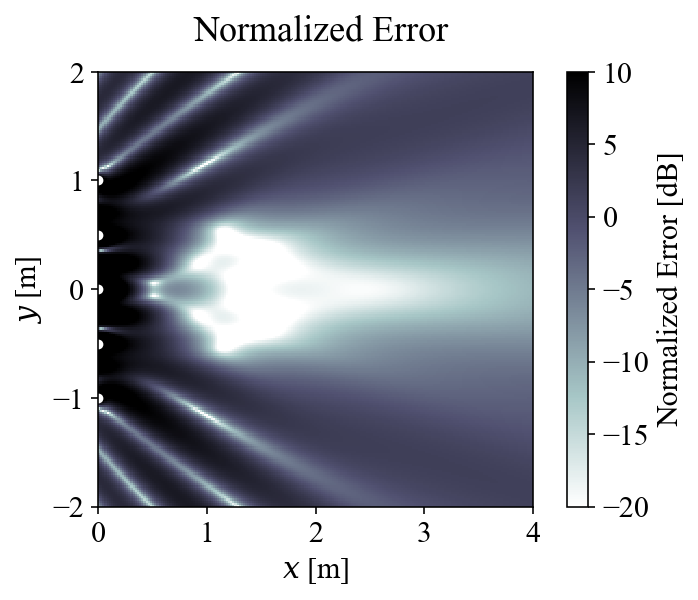

In [27]:
fig, ax = plt.subplots()
fig.suptitle(f'Normalized Error')

im = ax.pcolorfast(X, Y, NE_true[0].reshape(X.size, Y.size), vmin=10, vmax=-20, cmap='bone_r')
ax.set_xlabel(r'$x$ [m]')
ax.set_ylabel(r'$y$ [m]')
ax.set_aspect('equal')
fig.colorbar(im).set_label('Normalized Error [dB]')

ax.scatter(TEMP_SPEAKERS.get_arbit_param('x'), TEMP_SPEAKERS.get_arbit_param('y'), s=15, c='white', marker="o")

In [37]:
STEP_S = 0.1
X_S = np.array([0])
Y_S = np.arange(-1.5, 1.5+STEP_S, STEP_S)
Z_S = np.arange(-1.5, 1.5+STEP_S, STEP_S)
X_S, Y_S, Z_S = np.meshgrid(X_S, Y_S, Z_S)
SPEAKERS = SourceParams(SourceCategory.POINT, np.column_stack((X_S.flatten(), Y_S.flatten(), Z_S.flatten())).flatten())

In [38]:
SPEAKERS

{0: {'x': 0.0, 'y': -1.5, 'z': -1.5},
 1: {'x': 0.0, 'y': -1.5, 'z': -1.4},
 2: {'x': 0.0, 'y': -1.5, 'z': -1.2999999999999998},
 3: {'x': 0.0, 'y': -1.5, 'z': -1.1999999999999997},
 4: {'x': 0.0, 'y': -1.5, 'z': -1.0999999999999996},
 5: {'x': 0.0, 'y': -1.5, 'z': -0.9999999999999996},
 6: {'x': 0.0, 'y': -1.5, 'z': -0.8999999999999995},
 7: {'x': 0.0, 'y': -1.5, 'z': -0.7999999999999994},
 8: {'x': 0.0, 'y': -1.5, 'z': -0.6999999999999993},
 9: {'x': 0.0, 'y': -1.5, 'z': -0.5999999999999992},
 10: {'x': 0.0, 'y': -1.5, 'z': -0.4999999999999991},
 11: {'x': 0.0, 'y': -1.5, 'z': -0.399999999999999},
 12: {'x': 0.0, 'y': -1.5, 'z': -0.29999999999999893},
 13: {'x': 0.0, 'y': -1.5, 'z': -0.19999999999999885},
 14: {'x': 0.0, 'y': -1.5, 'z': -0.09999999999999876},
 15: {'x': 0.0, 'y': -1.5, 'z': 1.3322676295501878e-15},
 16: {'x': 0.0, 'y': -1.5, 'z': 0.10000000000000142},
 17: {'x': 0.0, 'y': -1.5, 'z': 0.2000000000000015},
 18: {'x': 0.0, 'y': -1.5, 'z': 0.3000000000000016},
 19: {'x': 

In [33]:
X_S

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])